Data from :

- https://www.kaggle.com/datasets/deepcontractor/top-video-games-19952021-metacritic/data
- https://www.kaggle.com/datasets/skateddu/metacritic-all-time-games-stats

In [2]:
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df1 = pd.read_csv(r'C:\Users\Utilisateur\PycharmProjects\artefactGameRecommendation\project\input\all_games.csv')
df2 = pd.read_csv(r'C:\Users\Utilisateur\PycharmProjects\artefactGameRecommendation\project\input\metacritic_games.csv')

# Merging data

In [4]:
df1.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [5]:
df1.shape

(18800, 6)

In [6]:
df2.head()

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1-4,T,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,94,47,0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,86,18,1,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,NaN,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,69,1,0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,94,46,0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0,94,84,4,1,8.8


In [7]:
df2.shape

(20422, 18)

I will merge the datasets on both name and platforms, but the platforms names on the second dataset are formatted differently and need to be renamed.

In [8]:
df1["platform"].value_counts()

platform
 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: count, dtype: int64

In [9]:
df2["platform"].value_counts()

platform
PC        5448
X360      1833
PS4       1822
PS2       1531
PS3       1478
XONE      1315
DS         991
WII        875
XBOX       838
Switch     815
PSP        607
GBA        600
3DS        541
GC         512
VITA       408
WIIU       320
PS         256
DC         143
N64         89
Name: count, dtype: int64

In [10]:
replacement_dict = {'X360': 'Xbox 360',
                    'PS3': 'PlayStation 3',
                    'PS4': 'PlayStation 4',
                    'PS2': 'PlayStation 2',
                    'XONE': 'Xbox One',
                    'WII': 'Wii',
                    'XBOX': 'Xbox',
                    'GBA': 'Game Boy Advance',
                    'GC': 'GameCube',
                    'VITA': 'Playstation Vita',
                    'WIIU': 'Wii U',
                    'PS': 'PlayStation',
                    'DC': 'Dreamcast',
                    'N64': 'Nintendo 64'}
df2['platform'] = df2['platform'].replace(replacement_dict)

In [11]:
df2['platform'].value_counts()

platform
PC                  5448
Xbox 360            1833
PlayStation 4       1822
PlayStation 2       1531
PlayStation 3       1478
Xbox One            1315
DS                   991
Wii                  875
Xbox                 838
Switch               815
PSP                  607
Game Boy Advance     600
3DS                  541
GameCube             512
Playstation Vita     408
Wii U                320
PlayStation          256
Dreamcast            143
Nintendo 64           89
Name: count, dtype: int64

Note that since one of the dataset is slightly older than the other, doing things this way means we won't have information on games for the more recent PS5 or XBOX Series X.

Before merging the datasets, I will remove the release date, metascore, and user_score column from df2, since this information is already present in df1.

In [12]:
df2 = df2.drop(columns=["release_date", "metascore", "user_score"])

In [13]:
df1['platform'] = df1['platform'].str.strip() # This line removes the hidden white space located before platform names in df1, messing the merge

In [14]:
df = pd.merge(df1, df2, on=['name', 'platform'], how='inner')

In [15]:
df.head(100)

,name,platform,release_date,summary,meta_score,user_review,developer,publisher,genre(s),players,rating,attribute,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,Nintendo,Action Adventure,1 Player,E,NaN,/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0,918,42,37
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,/game/playstation/tony-hawks-pro-skater-2,19,0,0,41,8,5
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,/game/playstation-3/grand-theft-auto-iv,64,0,0,400,142,97
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Namco,Namco,Action,1-2,T,NaN,/game/dreamcast/soulcalibur,24,0,0,65,2,1
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,/game/xbox-360/grand-theft-auto-iv,86,0,0,630,178,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Grim Fandango,PC,"October 14, 1998",Something's rotten in the Land of Dead and you...,94,9.1,LucasArts,LucasArts,Adventure,No Online Multiplayer,T,NaN,/game/pc/grim-fandango,15,0,0,71,0,0
96,Tom Clancy's Splinter Cell Chaos Theory,Xbox,"March 28, 2005","As Sam Fisher, Third Echelon's most skilled Sp...",94,9.1,Ubisoft Montreal,Ubisoft,Action Adventure,4 Online,M,NaN,/game/xbox/tom-clancys-splinter-cell-chaos-theory,70,0,0,56,3,2
97,Burnout 3: Takedown,Xbox,"September 7, 2004",Burnout 3 challenges you to crash into (and th...,94,7.7,Criterion Games,EA Games,Driving,8 Online,T,NaN,/game/xbox/burnout-3-takedown,76,0,0,60,10,1
98,Diablo,PC,"December 31, 1996",The kingdom of Khandaras has fallen into chaos...,94,8.7,Blizzard Entertainment,Blizzard Entertainment,Role-Playing,1-4,M,NaN,/game/pc/diablo,12,0,0,84,8,7


In [16]:
df.shape

(14046, 19)

In [17]:
df["platform"].value_counts()

platform
PC                  3740
Xbox 360            1433
PlayStation 4       1325
PlayStation 2       1244
PlayStation 3       1125
Xbox One             781
Xbox                 687
DS                   609
Wii                  534
Switch               495
PSP                  450
GameCube             402
Game Boy Advance     379
3DS                  337
PlayStation          165
Wii U                162
Dreamcast            113
Nintendo 64           65
Name: count, dtype: int64

After merging the datasets, we have created a single dataset combining information on a total of 12 637 games common to both datasets, which should be enough for our purposes.

# Cleaning data

In [18]:
def dataset_quality(data) :

# This function will show, for each column in our dataframe,
# its name, its type of data, the number of unique values,
# and the percentage of missing data.

  print(f"Number of rows : {len(data)} | Number of columns : {len(data.columns)}")

  a = []
  b = []
  c = []
  d = []

  for columns in data.columns :
    a.append(columns)
    b.append(data[columns].dtype)
    c.append(len(data[columns].unique()))
    d.append(data[columns].isna().mean() *100)

  data_quality = DataFrame(data = a, columns = ["Column name"])
  data_quality["Column type"] = b
  data_quality["Unique values"] = c
  data_quality["% missing"] = d

  return data_quality

In [19]:
dataset_quality(df)

Number of rows : 14046 | Number of columns : 19


,Column name,Column type,Unique values,% missing
0,name,object,9392,0.000000
1,platform,object,18,0.000000
2,release_date,object,3798,0.000000
3,summary,object,11159,0.633632
4,meta_score,int64,80,0.000000
5,user_review,object,86,0.000000
6,developer,object,3310,0.106792
7,publisher,object,1417,0.028478
8,genre(s),object,58,0.000000
9,players,object,54,30.848640


Here is what we can learn from this analysis : there are 14 046 rows in our dataframe but only 9392 unique games. This is because some games appear on multiple platforms.
The 'attribute' column is almost empty and will need to be removed.
The 'players' column is missing a lot of data, but we can always default the missing data to "1-player".
The 'rating' column is missing a bit of data. While this information can be useful (tells us what games are not suitable for children), it is not necessarily crucial. Furthermore, this information can be found later.

For the few rows where 'developer' is missing, we'll simply use the publisher instead. For the only missing both (Wild West Online), a quick search will tell us the developer (WWO Partners Ltd).

In [20]:
df.loc[df['developer'].isnull()].head(15)

,name,platform,release_date,summary,meta_score,user_review,developer,publisher,genre(s),players,rating,attribute,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
574,Out of the Park Baseball 15,PC,"April 21, 2014",In OOTP 15 you guide your team to glory. Set u...,89,7.2,NaN,Out Of The Park Developments,Sports,NaN,NaN,NaN,/game/pc/out-of-the-park-baseball-15,8,0,0,14,0,1
5437,Rugby 06,Xbox,"February 14, 2006",Rugby 06 is the latest addition to EA's Rugby ...,76,tbd,NaN,Electronic Arts,Sports,6 Online,E,NaN,/game/xbox/rugby-06,12,6,0,0,0,0
5990,Space Colony,PC,"October 14, 2003",Space the final frontier... not anymore. In Sp...,75,7.9,NaN,FireFly Studios,Strategy,No Online Multiplayer,NaN,NaN,/game/pc/space-colony-steam-edition,6,4,0,0,0,0
7100,Outlast: Whistleblower,PC,"May 6, 2014","As Waylon Park, the whistleblower who emailed ...",73,7.9,NaN,Red Barrels,Action Adventure,NaN,M,NaN,/game/pc/outlast-whistleblower,6,6,0,20,5,4
8246,Call of Duty: Advanced Warfare - Supremacy,Xbox One,"June 2, 2015","Battle your way to Supremacy, the third downlo...",71,6.4,NaN,Activision,Action,NaN,NaN,NaN,/game/xbox-one/call-of-duty-advanced-warfare--...,6,5,0,1,1,0
9019,Real Soccer 2009,DS,"November 4, 2008","(Also known as ""Real Football 2009"") Feel as c...",70,tbd,NaN,Gameloft,Sports,1-4,E,NaN,/game/ds/real-soccer-2009-dsiware,3,2,0,0,0,0
9251,The Simpsons Arcade Game,PlayStation 3,"February 7, 2012",The long-awaited home console port of the clas...,69,5.7,NaN,Konami,Action,1 Player,E10+,NaN,/game/playstation-3/the-simpsons-arcade-game,5,8,0,1,4,2
10031,The Simpsons Arcade Game,Xbox 360,"February 3, 2012","In The Simpsons Arcade Game, play as your favo...",67,7.2,NaN,Konami,Action,1-4,E10+,NaN,/game/xbox-360/the-simpsons-arcade-game,12,11,3,4,1,1
12055,Blitz: The League II,PlayStation 3,"October 13, 2008",Blitz: The League II continues the franchise l...,62,7.5,NaN,Midway,Sports,2,M,NaN,/game/playstation-3/blitz-the-league-ii,6,16,3,3,2,0
12451,Future Tactics: The Uprising,Xbox,"May 10, 2004",Welcome to the future--a place where creatures...,61,tbd,NaN,Crave,Strategy,1-2,T,NaN,/game/xbox/future-tactics-the-uprising,2,19,3,0,0,1


In [21]:
df.loc[df['developer'].isnull(), 'developer'] = df.loc[df['developer'].isnull(), 'publisher']
df.at[12587, "developer"] = "WWO Partners Ltd"

Let's remove the 'attribute' column since it is almost empty.

In [22]:
df = df.drop(columns='attribute', axis=1)

We'll keep the 'developer' column since games from the same developers tend to share some similarities. If a player likes a game by a certain developer there is a good chance they'll like other games from the same developers.

For the release date, we will only keep the year of release since that is the most relevant information.

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_date'] = df['release_date'].dt.year
df.rename(columns={'release_date': 'release_year'}, inplace=True)

In [24]:
df.head()

,name,platform,release_year,summary,meta_score,user_review,developer,publisher,genre(s),players,rating,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,Nintendo,Action Adventure,1 Player,E,/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0,918,42,37
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,98,7.4,Neversoft Entertainment,Activision,Sports,1-2,T,/game/playstation/tony-hawks-pro-skater-2,19,0,0,41,8,5
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,/game/playstation-3/grand-theft-auto-iv,64,0,0,400,142,97
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",98,8.4,Namco,Namco,Action,1-2,T,/game/dreamcast/soulcalibur,24,0,0,65,2,1
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,/game/xbox-360/grand-theft-auto-iv,86,0,0,630,178,106


The 'players' columns can be simplified to whether or not the game has multiplayer. For missing data, we'll default to no multiplayer.

In [25]:
df["players"].value_counts()

players
No Online Multiplayer    2663
1 Player                 1818
1-2                      1115
1-4                       890
2  Online                 346
Up to 4                   297
4  Online                 287
1-8                       268
Online Multiplayer        239
8  Online                 227
2                         215
Up to 8                   190
16  Online                114
Massively Multiplayer     101
Up to 6                    84
1-16                       82
6  Online                  74
Up to 16                   73
Up to 12                   73
Up to 10                   59
1-6                        55
32  Online                 38
12  Online                 37
10  Online                 36
1-32                       36
24  Online                 28
Up to 18                   28
Up to 22                   24
1-3                        23
1-5                        16
Up to 24                   16
1-12                       15
Up to 64                   14
Up

In [26]:
df['players'].fillna('No Multiplayer', inplace=True)

for index, row in df.iterrows():
    if df.at[index, "players"] == "No Multiplayer" :
        continue

    if df.at[index, "players"] == "No Online Multiplayer" :
        df.at[index, "players"] = "No Multiplayer"

    elif df.at[index, "players"] == "1 Player" :
        df.at[index, "players"] = "No Multiplayer"

    else :
        df.at[index, "players"] = "Multiplayer"

df.rename(columns={'players': 'multiplayer'}, inplace=True)

In [27]:
df["multiplayer"].value_counts()

multiplayer
No Multiplayer    8814
Multiplayer       5232
Name: count, dtype: int64

Let's handle the rest of the missing values. For 'developer', the amount of missing date is low enough that we can just put "unspecified" for the missing info.

In [28]:
df['developer'].fillna('unspecified', inplace=True)

For the ratings, we have missing values and values that need to be changed. The proper ratings for games according to the ESRB are :
- E (Everyone)
- E10+ (Everyone 10 and older)
- T (Teen)
- M (Mature)

In [29]:
df['rating'].value_counts()

rating
T       4246
E       3892
M       2709
E10+    1918
RP        18
K-A        4
AO         2
Name: count, dtype: int64

RP means Rating Pending, so we'll add a new value "Not Rated" that will handle those values, and we can add the missing values to those as well.
K-A means Kids to Adult, which is an old rating that has been replaced by the E rating.
AO means Adult Only, so we'll change those to M.

In [30]:
df['rating'].fillna('Not Rated', inplace=True)

for index, row in df.iterrows():
    if df.at[index, "rating"] == "RP" :
        df.at[index, "rating"] = "Not Rated"

    elif df.at[index, "rating"] == "AO" :
        df.at[index, "rating"] = "M"

    elif df.at[index, "rating"] == "K-A" :
       df.at[index, "rating"] = "E"

In [31]:
df['rating'].value_counts()

rating
T            4246
E            3896
M            2711
E10+         1918
Not Rated    1275
Name: count, dtype: int64

The last missing values are those in 'summary', we'll simply change those to an empty string.

In [32]:
df.loc[df['summary'].isnull()].head(100)

,name,platform,release_year,summary,meta_score,user_review,developer,publisher,genre(s),multiplayer,rating,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
748,Injustice 2: Legendary Edition,PlayStation 4,2018,NaN,88,7.6,NetherRealm Studios,Warner Bros. Interactive Entertainment,Action,Multiplayer,Not Rated,/game/playstation-4/injustice-2-legendary-edition,7,0,0,9,3,0
1293,Moto Racer Advance,Game Boy Advance,2002,NaN,86,tbd,Delphine Software International,Ubisoft,Driving,No Multiplayer,E,/game/game-boy-advance/moto-racer-advance,8,2,0,1,0,0
1345,Mini Metro,Switch,2018,NaN,86,8.4,"Radial Games Corp., Dinosaur Polo Club",Radial Games Corp.,Strategy,No Multiplayer,E,/game/switch/mini-metro,9,0,0,3,0,0
1440,Out of the Park Baseball 13,PC,2012,NaN,85,7.8,Out Of The Park Developments,Out Of The Park Developments,Sports,No Multiplayer,Not Rated,/game/pc/out-of-the-park-baseball-13,7,1,0,40,0,2
2077,Guild Wars 2: Path of Fire,PC,2017,NaN,83,7.3,ArenaNet,ArenaNet,Role-Playing,No Multiplayer,T,/game/pc/guild-wars-2-path-of-fire,12,1,0,53,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12991,Men in Black - The Series: Crashdown,PlayStation,2001,NaN,59,6.4,Runecraft,Infogrames,Action,No Multiplayer,T,/game/playstation/men-in-black---the-series-cr...,2,4,1,1,0,1
13626,One Piece: Unlimited Cruise SP 2,3DS,2012,NaN,49,7.5,Bandai Namco Games,Namco Bandai Games,Action,No Multiplayer,Not Rated,/game/3ds/one-piece-unlimited-cruise-sp-2,0,5,2,1,0,0
13715,Surgeon Simulator: Experience Reality,PlayStation 4,2016,NaN,43,4.3,Bossa Studios,Bossa Studios,Simulation,No Multiplayer,T,/game/playstation-4/surgeon-simulator-experien...,0,2,6,1,0,2
13797,The Ripping Friends,Game Boy Advance,2002,NaN,38,tbd,Creations,THQ,Action,No Multiplayer,E,/game/game-boy-advance/the-ripping-friends,0,2,10,0,0,0


In [33]:
df['summary'].fillna('', inplace=True)

For the games' genres, we will regroup similar genres to avoid having too many categories.

In [34]:
df['genre(s)'].value_counts()

genre(s)
Action                          4673
Action Adventure                1689
Sports                          1365
Role-Playing                    1302
Strategy                        1168
Miscellaneous                   1029
Driving                          821
Adventure                        730
Simulation                       440
General                          181
Racing                           140
Puzzle                           128
Fantasy                           55
Sci-Fi                            55
Modern                            42
Shooter                           30
Action RPG                        29
Horror                            23
Platformer                        21
Historic                          18
First-Person                       9
Traditional                        8
PC-style RPG                       7
Fighting                           7
GT / Street                        6
Massively Multiplayer Online       6
Arcade                       

In [35]:
replacement_dict = {'Driving': 'Racing',
                    'Rally / Offroad': 'Racing',
                    'Formula One': 'Racing',
                    'Turn-Based': 'Strategy',
                    'Real-Time': 'Strategy',
                    'City Building': 'Strategy',
                    'MOBA': 'Strategy',
                    'General': 'Miscellaneous',
                    'Tycoon': 'Simulation',
                    'Virtual Life': 'Simulation',
                    'Fantasy': 'Fantasy & Sci-Fi',
                    'Sci-Fi': 'Fantasy & Sci-Fi',
                    'Action RPG': 'Role-Playing',
                    'Modern': 'Fantasy & Sci-Fi',
                    'Japanese-Style': 'Role-Playing',
                    'Console-style RPG': 'Role-Playing',
                    'PC-style RPG': 'Role-Playing',
                    'Traditional': 'Role-Playing',
                    'GT / Street': 'Racing',
                    'Sim': 'Simulation',
                    'Scrolling': 'Arcade',
                    '2D': 'Arcade',
                    '3D': 'Arcade',
                    'Military': 'Historic',
                    'WWI': 'Historic',
                    'Ice Hockey': 'Sports',
                    'Olympic Sports': 'Sports',
                    'First-Person': 'Shooter',
                    'Third-Person': 'Shooter',
                    'Beat-\'Em-Up': 'Fighting',
                    'Street': 'Miscellaneous',
                    'Pinball': 'Puzzle',
                    'Alternative': 'Miscellaneous',
                    'Other': 'Miscellaneous'
                    }
df['genre(s)'] = df['genre(s)'].replace(replacement_dict)

In [36]:
df['genre(s)'].value_counts()

genre(s)
Action                          4673
Action Adventure                1689
Sports                          1368
Role-Playing                    1354
Miscellaneous                   1215
Strategy                        1172
Racing                           970
Adventure                        730
Simulation                       448
Fantasy & Sci-Fi                 152
Puzzle                           129
Shooter                           42
Horror                            23
Historic                          21
Platformer                        21
Arcade                            15
Fighting                           8
Massively Multiplayer Online       6
Music                              2
Compilation                        2
Party                              2
Dancing                            1
Card Battle                        1
Breeding/Constructing              1
Edutainment                        1
Name: count, dtype: int64

The last columns we need to handle are the scores and reviews.
For the numerical score, we have the metascore (0-100) that is based on professional reviews, and the user_review score (0-10) which is based on user-submitted reviews.

In [37]:
df['user_review'].value_counts()

user_review
tbd    778
7.7    615
7.8    578
7.5    546
7.6    540
      ... 
9.3      2
1.3      2
9.4      1
9.6      1
1.2      1
Name: count, Length: 86, dtype: int64

Here we can see that a lot of user_review scores are missing. Therefore, for simplicity's sake, we will average both metascore and user score, while at the same time replacing missing user scores with metascore to create one single numerical scoring metric.

In [38]:
df['user_review'] = df.apply(lambda x: x['meta_score'] / 10 if x['user_review'] == 'tbd' else x['user_review'], axis=1) # Replaces the tbd values of user_reviews by metascore/10
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')

df['score'] = (df['user_review'] * 10 + df['meta_score']) / 2

In [39]:
df.head(50)

,name,platform,release_year,summary,meta_score,user_review,developer,publisher,genre(s),multiplayer,rating,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative,score
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,Nintendo,Action Adventure,No Multiplayer,E,/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0,918,42,37,95.0
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,98,7.4,Neversoft Entertainment,Activision,Sports,Multiplayer,T,/game/playstation/tony-hawks-pro-skater-2,19,0,0,41,8,5,86.0
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,Rockstar North,Rockstar Games,Action Adventure,No Multiplayer,M,/game/playstation-3/grand-theft-auto-iv,64,0,0,400,142,97,87.5
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",98,8.4,Namco,Namco,Action,Multiplayer,T,/game/dreamcast/soulcalibur,24,0,0,65,2,1,91.0
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Rockstar North,Rockstar Games,Action Adventure,No Multiplayer,M,/game/xbox-360/grand-theft-auto-iv,86,0,0,630,178,106,88.5
5,Super Mario Galaxy,Wii,2007,[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1,Nintendo,Nintendo,Action,No Multiplayer,E,/game/wii/super-mario-galaxy,73,0,0,608,46,26,94.0
6,Super Mario Galaxy 2,Wii,2010,"Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1,Nintendo EAD Tokyo,Nintendo,Action,No Multiplayer,E,/game/wii/super-mario-galaxy-2,87,0,0,294,16,15,94.0
7,Red Dead Redemption 2,Xbox One,2018,Developed by the creators of Grand Theft Auto ...,97,8.0,Rockstar Games,Rockstar Games,Action Adventure,Multiplayer,M,/game/xbox-one/red-dead-redemption-2,33,0,0,403,64,88,88.5
8,Grand Theft Auto V,Xbox One,2014,Grand Theft Auto 5 melds storytelling and game...,97,7.9,Rockstar North,Rockstar Games,Action Adventure,Multiplayer,M,/game/xbox-one/grand-theft-auto-v,14,0,0,118,16,15,88.0
9,Grand Theft Auto V,PlayStation 3,2013,"Los Santos is a vast, sun-soaked metropolis fu...",97,8.3,Rockstar North,Rockstar Games,Fantasy & Sci-Fi,Multiplayer,M,/game/playstation-3/grand-theft-auto-v,50,0,0,566,95,66,90.0


We will also add an "opinion" column that will simply reflect how many positive reviews the game has (compared to the total reviews).
I will add a small constant to both numerator and denominator to avoid favoring games with very few reviews.

In [40]:
# Adds a small constant (k) for Laplace Smoothing
k = 1

df["opinion"] =\
    (df["critic_positive"] + df["user_positive"] + k) / (df["critic_positive"] + df["critic_neutral"] + df["critic_negative"] +
                                                     df["user_positive"] + df["user_neutral"] + df["user_negative"] +2*k) * 100

In [41]:
df = df.drop(columns=['meta_score','user_review','critic_positive','critic_neutral','critic_negative','user_positive','user_neutral','user_negative'], axis=1)

In [42]:
df.head(100)

,name,platform,release_year,summary,developer,publisher,genre(s),multiplayer,rating,link,score,opinion
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,Nintendo,Action Adventure,No Multiplayer,E,/game/nintendo-64/the-legend-of-zelda-ocarina-...,95.0,92.164545
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,Neversoft Entertainment,Activision,Sports,Multiplayer,T,/game/playstation/tony-hawks-pro-skater-2,86.0,81.333333
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,Rockstar North,Rockstar Games,Action Adventure,No Multiplayer,M,/game/playstation-3/grand-theft-auto-iv,87.5,65.957447
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",Namco,Namco,Action,Multiplayer,T,/game/dreamcast/soulcalibur,91.0,95.744681
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,Rockstar North,Rockstar Games,Action Adventure,No Multiplayer,M,/game/xbox-360/grand-theft-auto-iv,88.5,71.556886
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Grim Fandango,PC,1998,Something's rotten in the Land of Dead and you...,LucasArts,LucasArts,Adventure,No Multiplayer,T,/game/pc/grim-fandango,92.5,98.863636
96,Tom Clancy's Splinter Cell Chaos Theory,Xbox,2005,"As Sam Fisher, Third Echelon's most skilled Sp...",Ubisoft Montreal,Ubisoft,Action Adventure,Multiplayer,M,/game/xbox/tom-clancys-splinter-cell-chaos-theory,92.5,95.488722
97,Burnout 3: Takedown,Xbox,2004,Burnout 3 challenges you to crash into (and th...,Criterion Games,EA Games,Racing,Multiplayer,T,/game/xbox/burnout-3-takedown,85.5,91.946309
98,Diablo,PC,1996,The kingdom of Khandaras has fallen into chaos...,Blizzard Entertainment,Blizzard Entertainment,Role-Playing,Multiplayer,M,/game/pc/diablo,90.5,85.840708


In [43]:
#df.to_csv(r'C:\Users\Utilisateur\PycharmProjects\artefactGameRecommendation\project\app\games_dataset_clean.csv', index=False)

In [44]:
dataset_quality(df)

Number of rows : 14046 | Number of columns : 12


,Column name,Column type,Unique values,% missing
0,name,object,9392,0.000000
1,platform,object,18,0.000000
2,release_year,int32,26,0.000000
3,summary,object,11159,0.000000
4,developer,object,3313,0.000000
5,publisher,object,1417,0.028478
6,genre(s),object,25,0.000000
7,multiplayer,object,2,0.000000
8,rating,object,5,0.000000
9,link,object,13966,0.000000


# Data Exploration

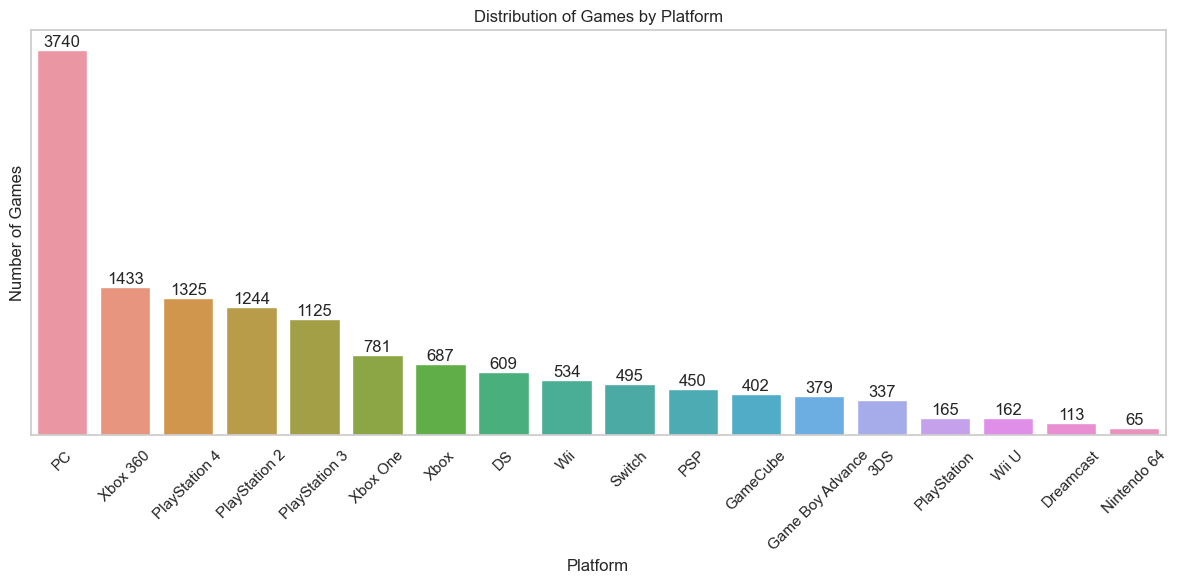

In [45]:
platform_counts = df['platform'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)

plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Platform')

for i, count in enumerate(platform_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.yticks([])

plt.tight_layout()
plt.show()

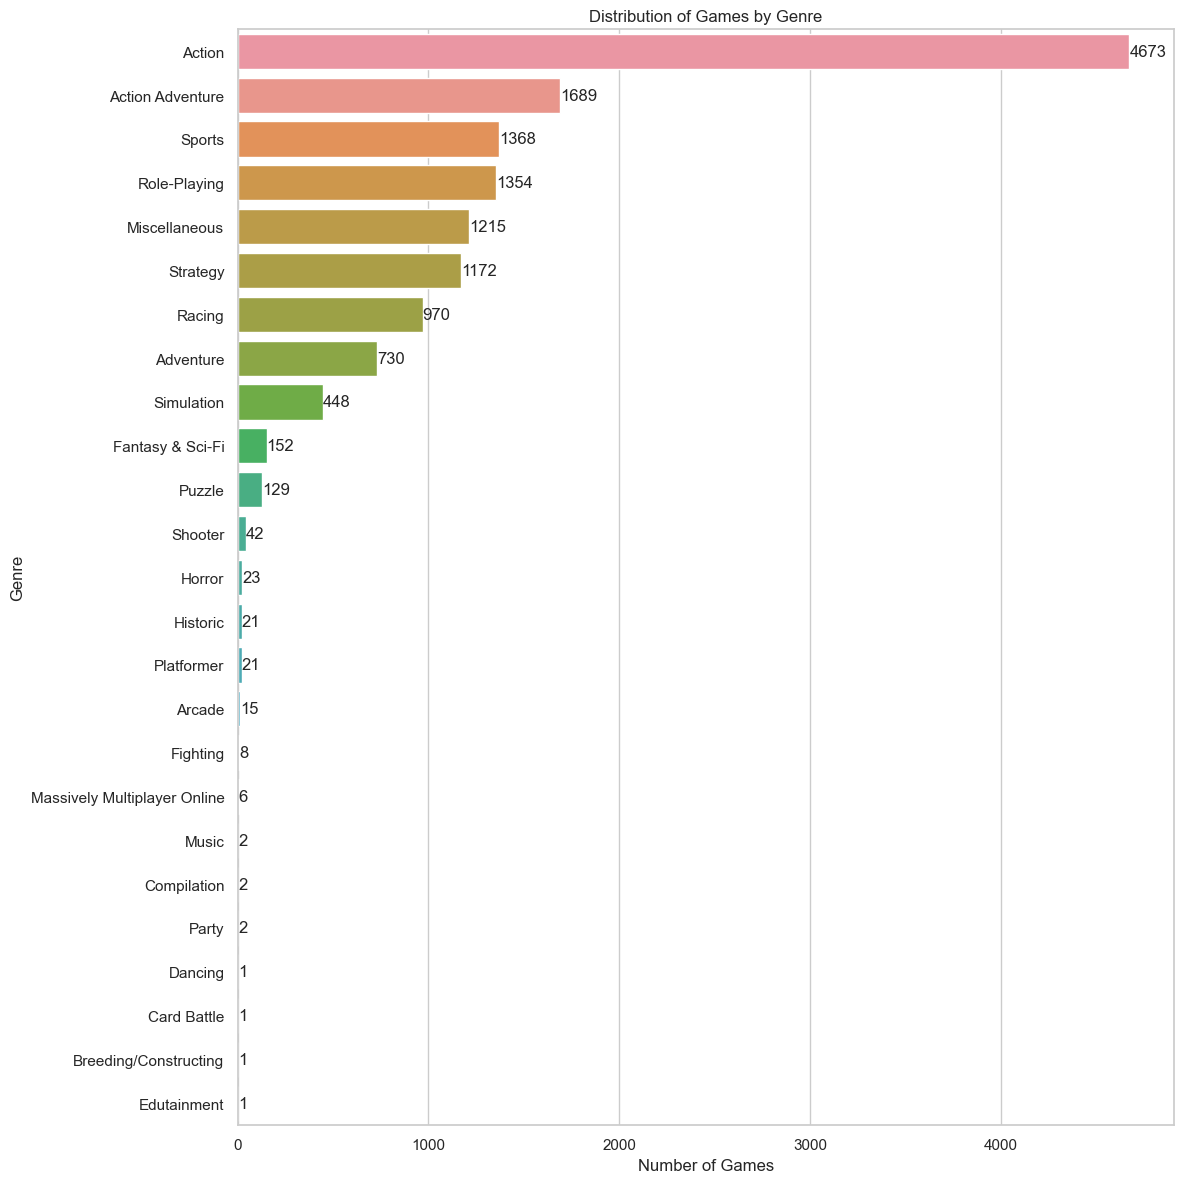

In [46]:
genre_counts = df['genre(s)'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 12))
sns.barplot(x=genre_counts.values, y=genre_counts.index, orient='h')

plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.title('Distribution of Games by Genre')

for i, count in enumerate(genre_counts):
    plt.text(count, i, str(count), ha='left', va='center')

plt.tight_layout()
plt.show()

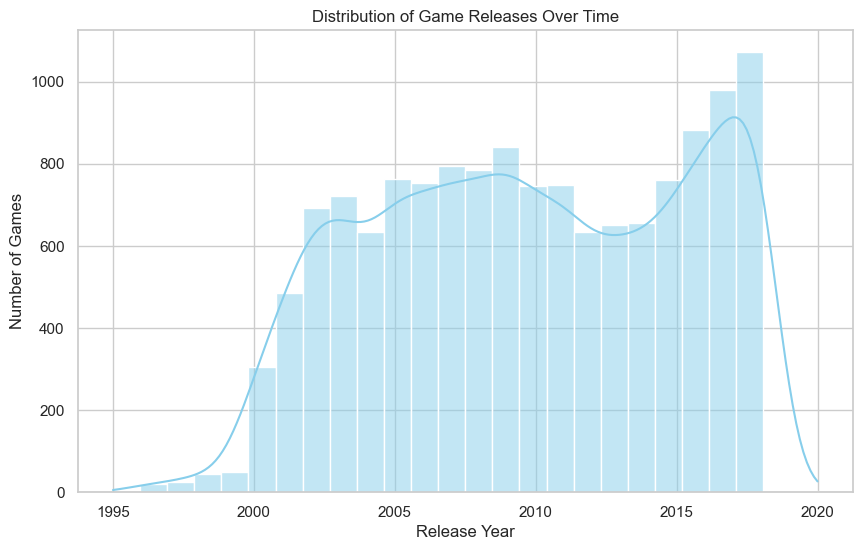

In [47]:
release_years = df['release_year'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(release_years, kde=True, bins=26, color='skyblue')

plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.title("Distribution of Game Releases Over Time")

plt.show()

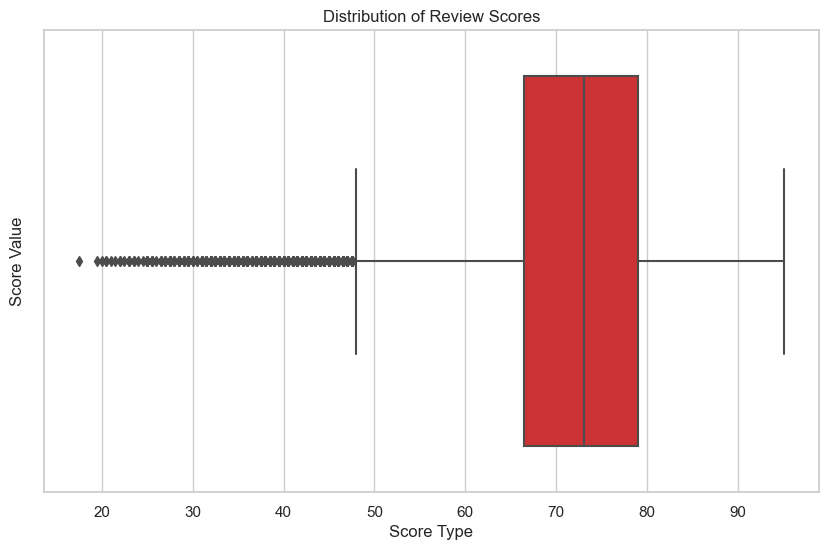

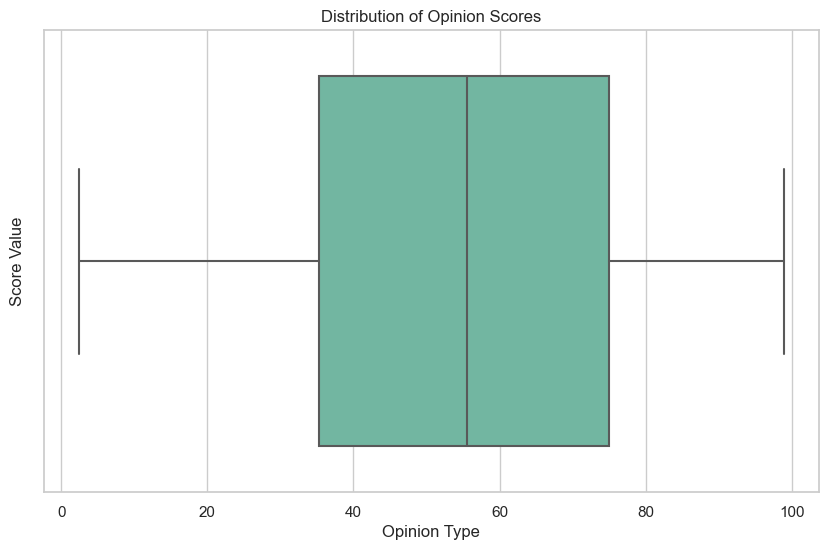

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='score', palette='Set1')
plt.title('Distribution of Review Scores')
plt.xlabel('Score Type')
plt.ylabel('Score Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='opinion', palette='Set2')
plt.title('Distribution of Opinion Scores')
plt.xlabel('Opinion Type')
plt.ylabel('Score Value')
plt.show()

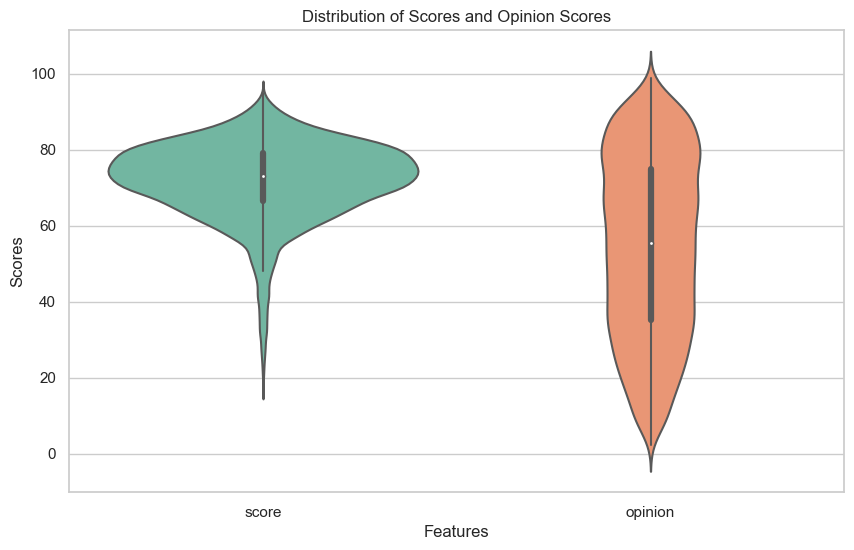

In [49]:
plt.figure(figsize=(10, 6))

sns.violinplot(data=df[['score', 'opinion']], palette="Set2")

plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Distribution of Scores and Opinion Scores")

plt.show()

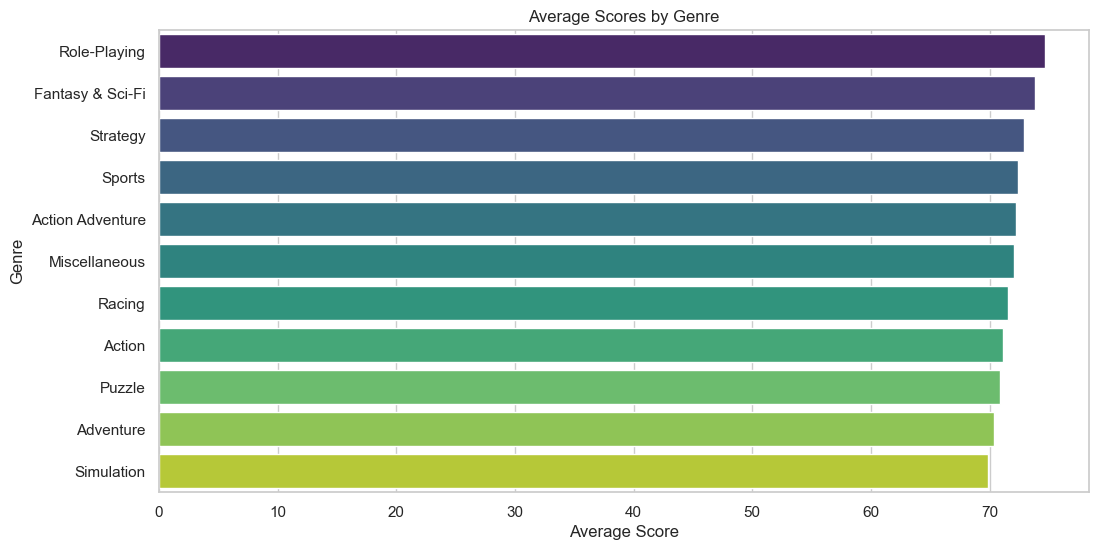

In [50]:
genre_counts = df['genre(s)'].value_counts()
popular_genres = genre_counts[genre_counts >= 50].index
df_filtered = df[df['genre(s)'].isin(popular_genres)]

genre_scores = df_filtered.groupby('genre(s)')['score'].mean().reset_index()

genre_scores = genre_scores.sort_values(by='score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='genre(s)', data=genre_scores, palette='viridis')
plt.title('Average Scores by Genre')
plt.xlabel('Average Score')
plt.ylabel('Genre')
plt.show()

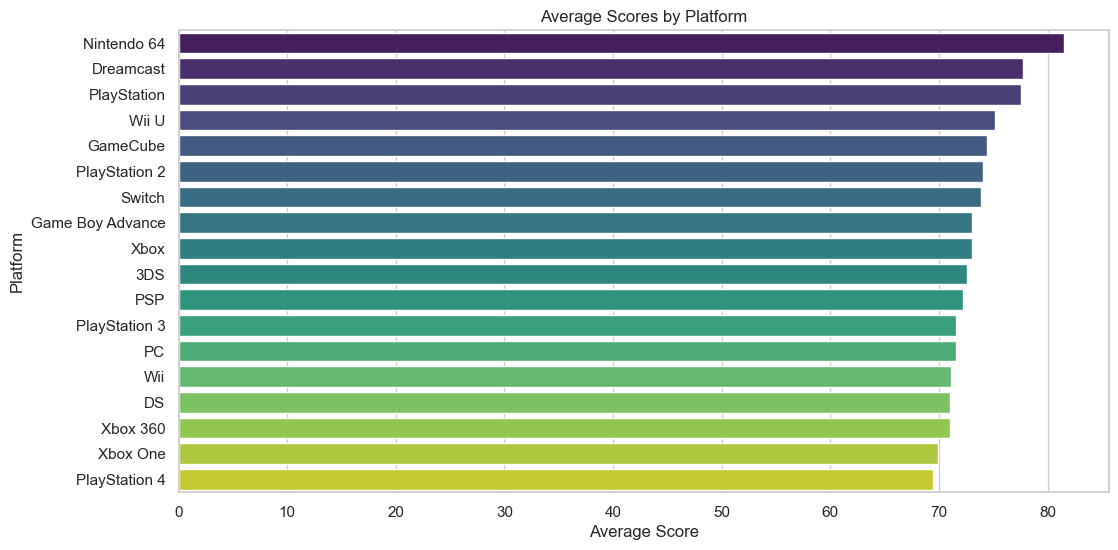

In [51]:
platform_scores = df.groupby('platform')['score'].mean().reset_index()

platform_scores = platform_scores.sort_values(by='score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='platform', data=platform_scores, palette='viridis')
plt.title('Average Scores by Platform')
plt.xlabel('Average Score')
plt.ylabel('Platform')
plt.show()

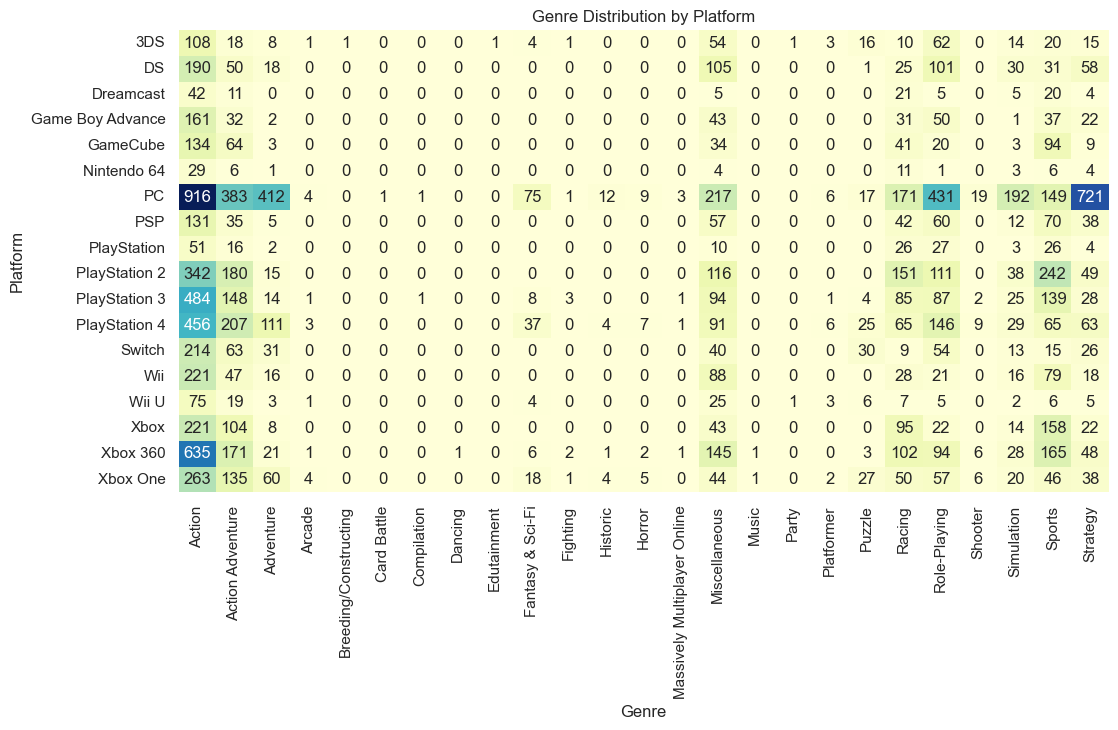

In [52]:
genre_platform_crosstab = pd.crosstab(df['platform'], df['genre(s)'])

plt.figure(figsize=(12, 6))
sns.heatmap(genre_platform_crosstab, cmap='YlGnBu', annot=True, fmt='d', cbar=False)
plt.title('Genre Distribution by Platform')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()

In [58]:
import plotly.express as px

platforms_data = df[['platform', 'release_year']]
platforms_count = platforms_data.groupby(['release_year', 'platform']).size().reset_index(name='count')

fig = px.line(platforms_count, x='release_year', y='count', color='platform',
              title='Platform Popularity over Time',
              labels={'count': 'Number of Games', 'release_year': 'Year of Release'})

fig.show()